In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pickle.load(open('final_project/final_project_dataset.pkl'))

In [3]:
df = pd.DataFrame.from_dict(data, orient='index')

In [4]:
df['email_address'] = df['email_address'].astype('string')

In [5]:
df = df.drop(['THE TRAVEL AGENCY IN THE PARK', 'TOTAL'])

In [6]:
len(df)

144

In [9]:
df['log_total_payments'] = np.log(df['total_payments'])

AttributeError: 'int' object has no attribute 'log'

In [8]:
from sklearn.feature_selection import SelectKBest

In [10]:
zeroed['percent_to_poi'] = zeroed['from_this_person_to_poi'] / zeroed['from_messages']

NameError: name 'zeroed' is not defined

In [74]:
zeroed['percent_from_poi'] = zeroed['from_poi_to_this_person'] / zeroed['to_messages']

In [76]:
zeroed = zeroed.fillna(0)

In [69]:
zeroed.columns

Index([u'salary', u'to_messages', u'deferral_payments', u'total_payments',
       u'exercised_stock_options', u'bonus', u'restricted_stock',
       u'shared_receipt_with_poi', u'restricted_stock_deferred',
       u'total_stock_value', u'expenses', u'loan_advances', u'from_messages',
       u'other', u'from_this_person_to_poi', u'poi', u'director_fees',
       u'deferred_income', u'long_term_incentive', u'email_address',
       u'from_poi_to_this_person', u'log_total_payments', u'percent_to_poi',
       u'percent_from_poi'],
      dtype='object')

In [77]:
X = zeroed.drop('poi', axis=1)[['exercised_stock_options','percent_to_poi','shared_receipt_with_poi', 'bonus', 'salary']].values
y = zeroed['poi'].values

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier

In [25]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        pass
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
from sklearn.model_selection import KFold

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [34]:
from sklearn.base import clone

In [35]:
import itertools

In [118]:
kfold = KFold(5, shuffle=True, random_state=272727)

In [37]:
plt.rcParams['figure.figsize'] = [15, 4]

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [110]:
names = ['Naive Bayes', 'Decision Tree', 'Logit', 'SVM', 'Dummy']

In [116]:
clfs = [GaussianNB(),
        DecisionTreeClassifier(),
        LogisticRegression(),
        LinearSVC(class_weight='balanced'),
        DummyClassifier()
       ]

In [112]:
X.shape

(144, 5)

In [122]:
from IPython.core.debugger import set_trace

[1]: Naive Bayes | precision: 0.75, recall: 0.375
[1]: Decision Tree | precision: 1.0, recall: 0.125
[1]: Logit | precision: 0.166666666667, recall: 0.125
[1]: SVM | precision: 0.0, recall: 0.0
[1]: Dummy | precision: 0.333333333333, recall: 0.125


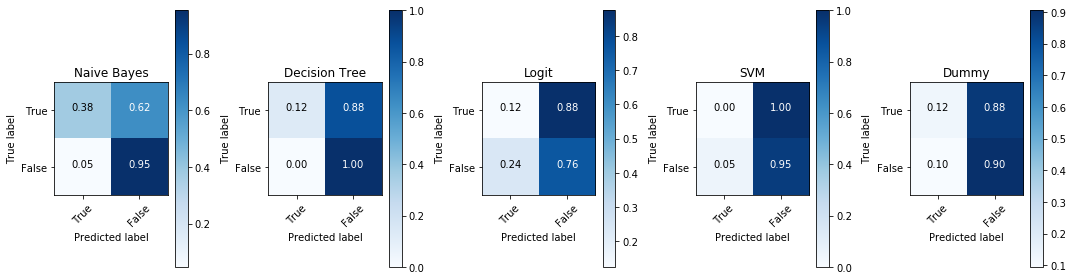

[2]: Naive Bayes | precision: 0.0, recall: 0.0
[2]: Decision Tree | precision: 0.0, recall: 0.0
[2]: Logit | precision: 0.0, recall: 0.0
[2]: SVM | precision: 0.0, recall: 0.0
[2]: Dummy | precision: 0.0, recall: 0.0


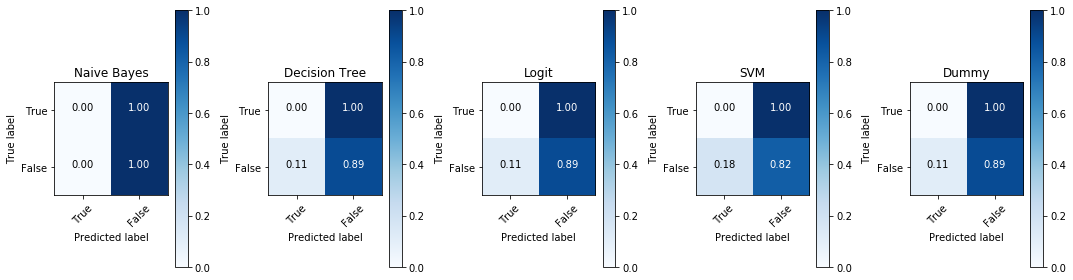

[3]: Naive Bayes | precision: 0.0, recall: 0.0
[3]: Decision Tree | precision: 0.5, recall: 0.333333333333
[3]: Logit | precision: 0.0, recall: 0.0
[3]: SVM | precision: 0.0869565217391, recall: 0.666666666667
[3]: Dummy | precision: 0.0, recall: 0.0


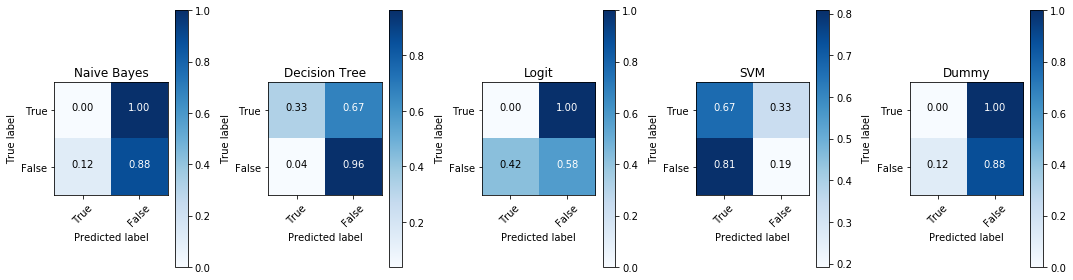

[4]: Naive Bayes | precision: 0.333333333333, recall: 0.333333333333
[4]: Decision Tree | precision: 0.4, recall: 0.666666666667
[4]: Logit | precision: 0.142857142857, recall: 0.333333333333
[4]: SVM | precision: 0.0, recall: 0.0
[4]: Dummy | precision: 0.2, recall: 0.333333333333


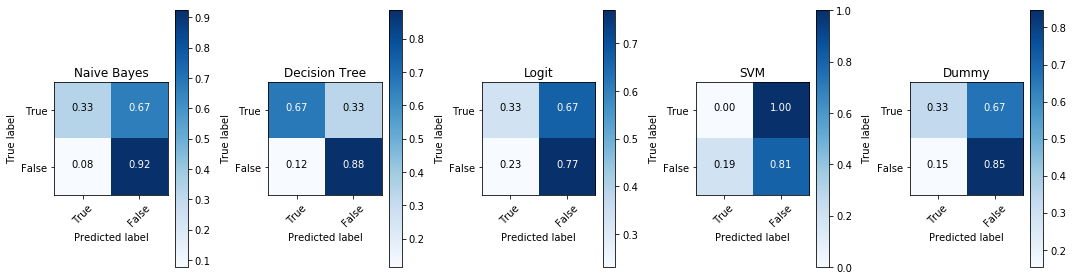

[5]: Naive Bayes | precision: 0.5, recall: 0.333333333333
[5]: Decision Tree | precision: 0.333333333333, recall: 0.333333333333
[5]: Logit | precision: 0.0, recall: 0.0
[5]: SVM | precision: 0.2, recall: 0.333333333333
[5]: Dummy | precision: 0.0, recall: 0.0


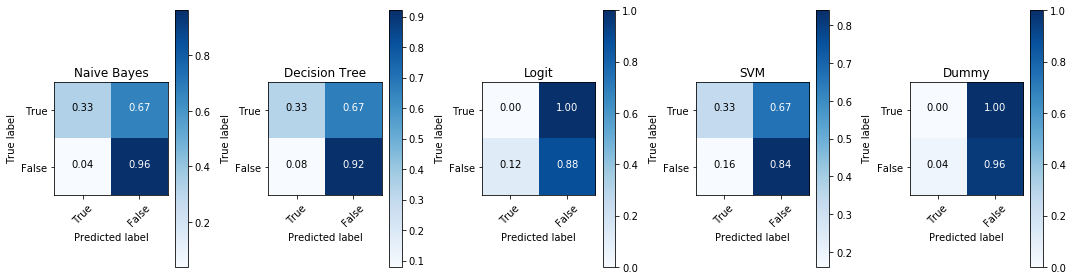

Naive Bayes | average precision: 0.5, average recall: 0.333333333333
Decision Tree | average precision: 2.06666666667, average recall: 1.42708333333
Logit | average precision: 0.0799529688419, average recall: 0.16049382716
SVM | average precision: 0.0663043478261, average recall: 0.208333333333
Dummy | average precision: 0.03456, average recall: 0.0542933333333


In [126]:
avg_precision = [0 for _ in range(len(clfs))]
avg_recall = [0 for _ in range(len(clfs))]
for trial, (train_i, test_i) in enumerate(kfold.split(X),1):
    for i, (name, clf) in enumerate(zip(names, clfs), 1):
        local_clf = clone(clf)
        local_clf.fit(X[train_i], y[train_i])
        y_pred = local_clf.predict(X[test_i])
        precision = precision_score(y[test_i], y_pred)
        recall = recall_score(y[test_i], y_pred)
        avg_precision[i-1] = precision if i == 1 else (avg_precision[i-1] * (trial-1) + precision) / i
        avg_recall[i-1] = recall if i == 1 else (avg_recall[i-1] * (trial-1) + recall) / i
        print('[{}]: {} | precision: {}, recall: {}'.format(trial, name, precision, recall))
        plt.subplot(1,5,i)
        cm = confusion_matrix(y[test_i], y_pred, labels=[True, False])
        plot_confusion_matrix(cm, ['True', 'False'], title=name, normalize=True)
    plt.show()
for (name, prec, rec) in zip(names, avg_precision, avg_recall):
    print('{} | average precision: {}, average recall: {}'.format(name,prec,rec))

[1]: Naive Bayes | precision: 0.75, recall: 0.375
[2]: Naive Bayes | precision: 0.166666666667, recall: 0.166666666667
[3]: Naive Bayes | precision: 0.25, recall: 0.25


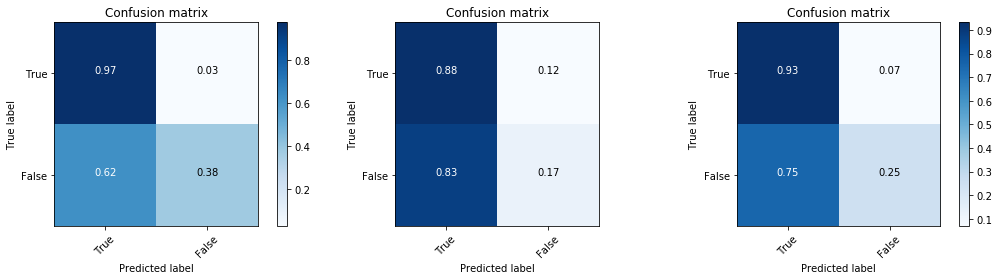

[1]: Decision Tree | precision: 0.285714285714, recall: 0.25
[2]: Decision Tree | precision: 0.0, recall: 0.0
[3]: Decision Tree | precision: 0.3, recall: 0.75


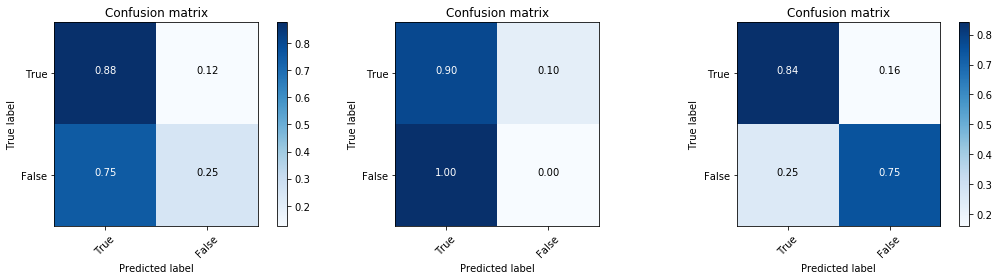

[1]: Logit | precision: 0.142857142857, recall: 0.125
[2]: Logit | precision: 0.0555555555556, recall: 0.166666666667
[3]: Logit | precision: 0.0, recall: 0.0


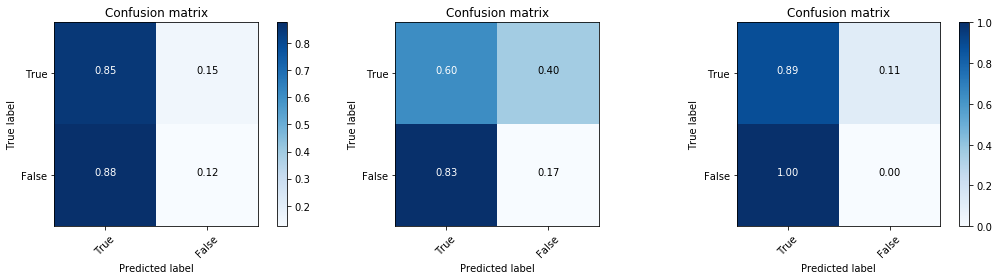

[1]: SVM | precision: 0.0, recall: 0.0
[2]: SVM | precision: 0.272727272727, recall: 0.5
[3]: SVM | precision: 0.1875, recall: 0.75


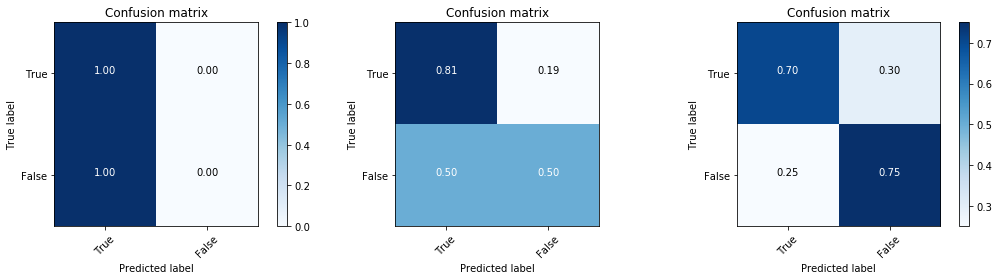

[1]: Dummy | precision: 0.0, recall: 0.0
[2]: Dummy | precision: 0.0, recall: 0.0
[3]: Dummy | precision: 0.0, recall: 0.0


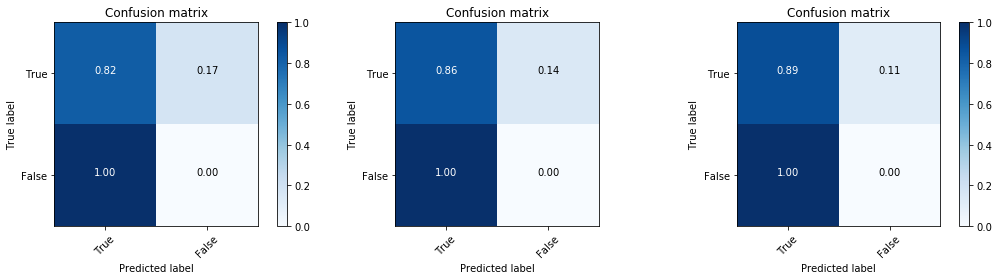

In [114]:
for name, clf in zip(names, clfs):
    for i, (train_i, test_i) in enumerate(kfold.split(X), 1):
        local_clf = clone(clf)
        local_clf.fit(X[train_i], y[train_i])
        y_pred = local_clf.predict(X[test_i])
        precision = precision_score(y[test_i], y_pred)
        recall = recall_score(y[test_i], y_pred)
        print('[{}]: {} | precision: {}, recall: {}'.format(i, name, precision, recall))
        plt.subplot(1,3,i)
        cm = confusion_matrix(y[test_i], y_pred)
        plot_confusion_matrix(cm, ['True', 'False'], name)
    plt.show()